In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [30]:
from google.colab import files
uploaded = files.upload()

Saving gas_turbines.csv to gas_turbines (1).csv


In [32]:
gas = pd.read_csv('gas_turbines.csv')
gas

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [33]:
gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [35]:
gas.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [36]:
gas[gas.duplicated()]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


In [37]:
gas1 = gas.drop(columns = ['AFDP','GTEP','TIT','TAT','TAT','CDP','CO','NOX'], axis = 1)
gas1.head()

,AT,AP,AH,TEY
0,6.8594,1007.9,96.799,114.70
1,6.7850,1008.4,97.118,114.72
2,6.8977,1008.8,95.939,114.71
3,7.0569,1009.2,95.249,114.72
4,7.3978,1009.7,95.150,114.72


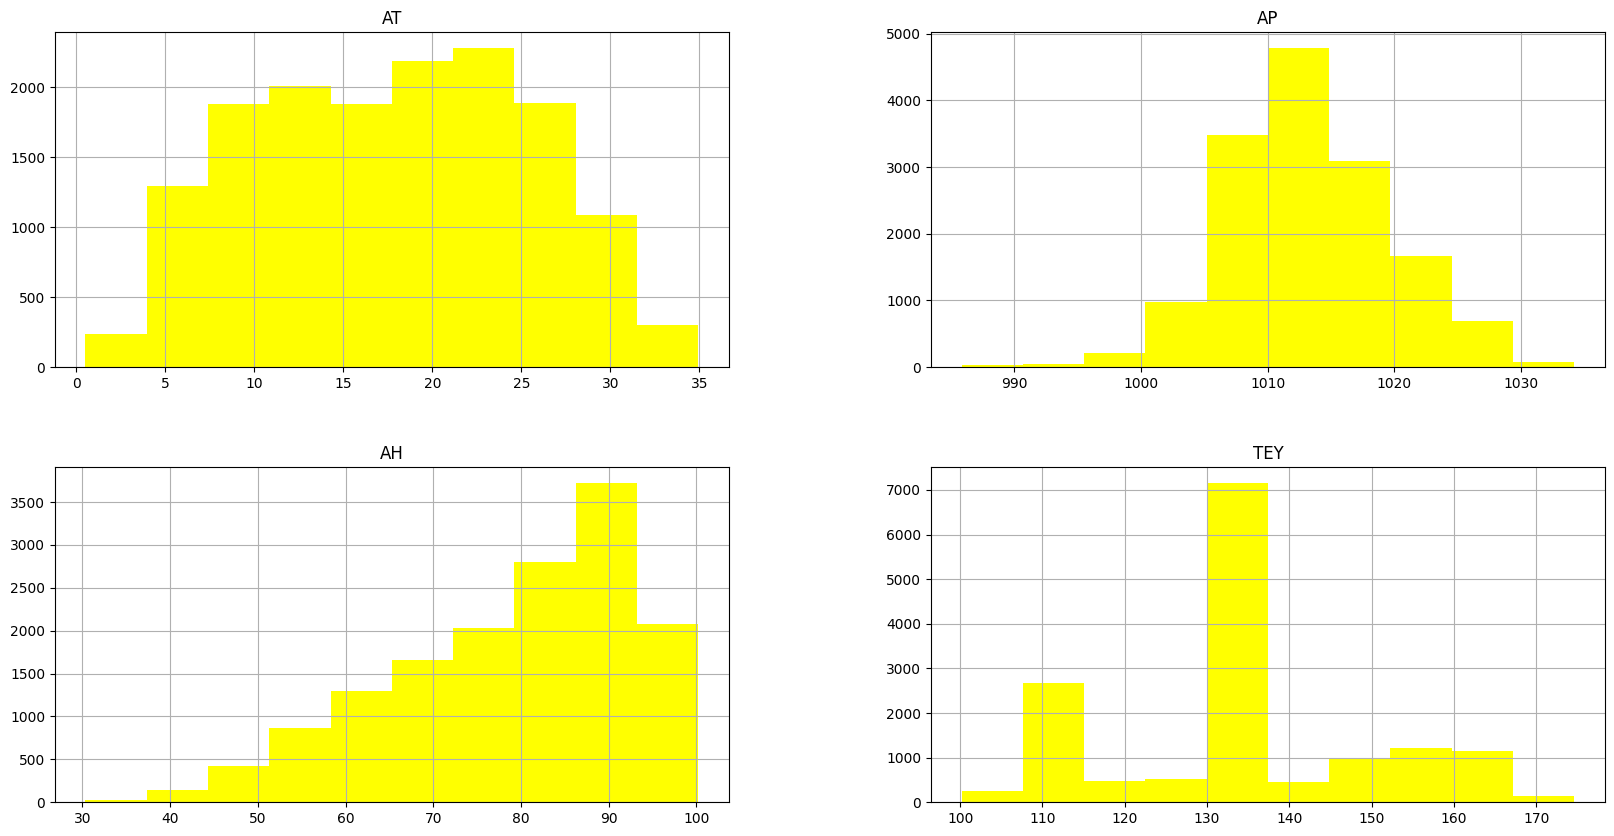

In [38]:
gas1.hist(figsize=(20,10),color='yellow')
plt.show()

In [39]:
gas1.describe()

,AT,AP,AH,TEY
count,15039.000000,15039.00000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,134.188464
std,7.574323,6.41076,13.793439,15.829717
min,0.522300,985.85000,30.344000,100.170000
25%,11.408000,1008.90000,69.750000,127.985000
50%,18.186000,1012.80000,82.266000,133.780000
75%,23.862500,1016.90000,90.043500,140.895000
max,34.929000,1034.20000,100.200000,174.610000


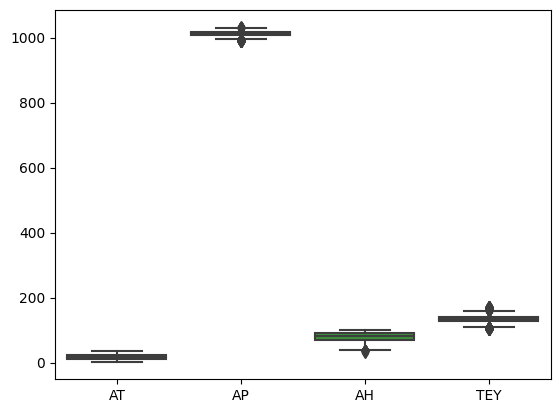

In [40]:
sns.boxplot(gas1, orient='v')
plt.show()

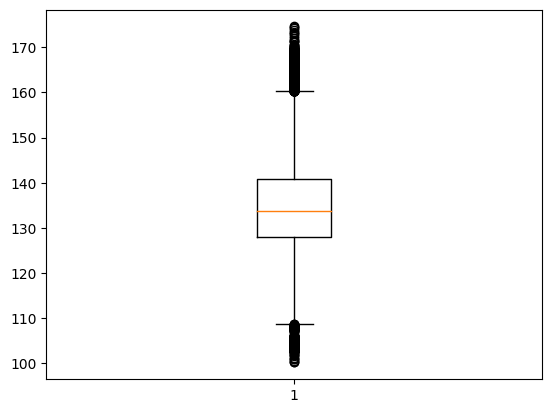

In [41]:
plt.boxplot(gas1['TEY'])
plt.show()

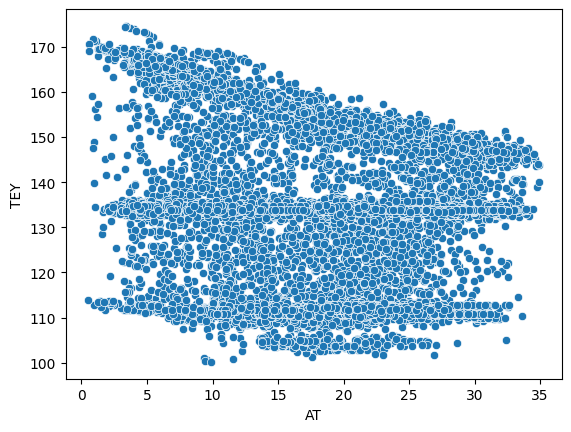

In [42]:
sns.scatterplot(x='AT',y='TEY',data=gas1)
plt.show()

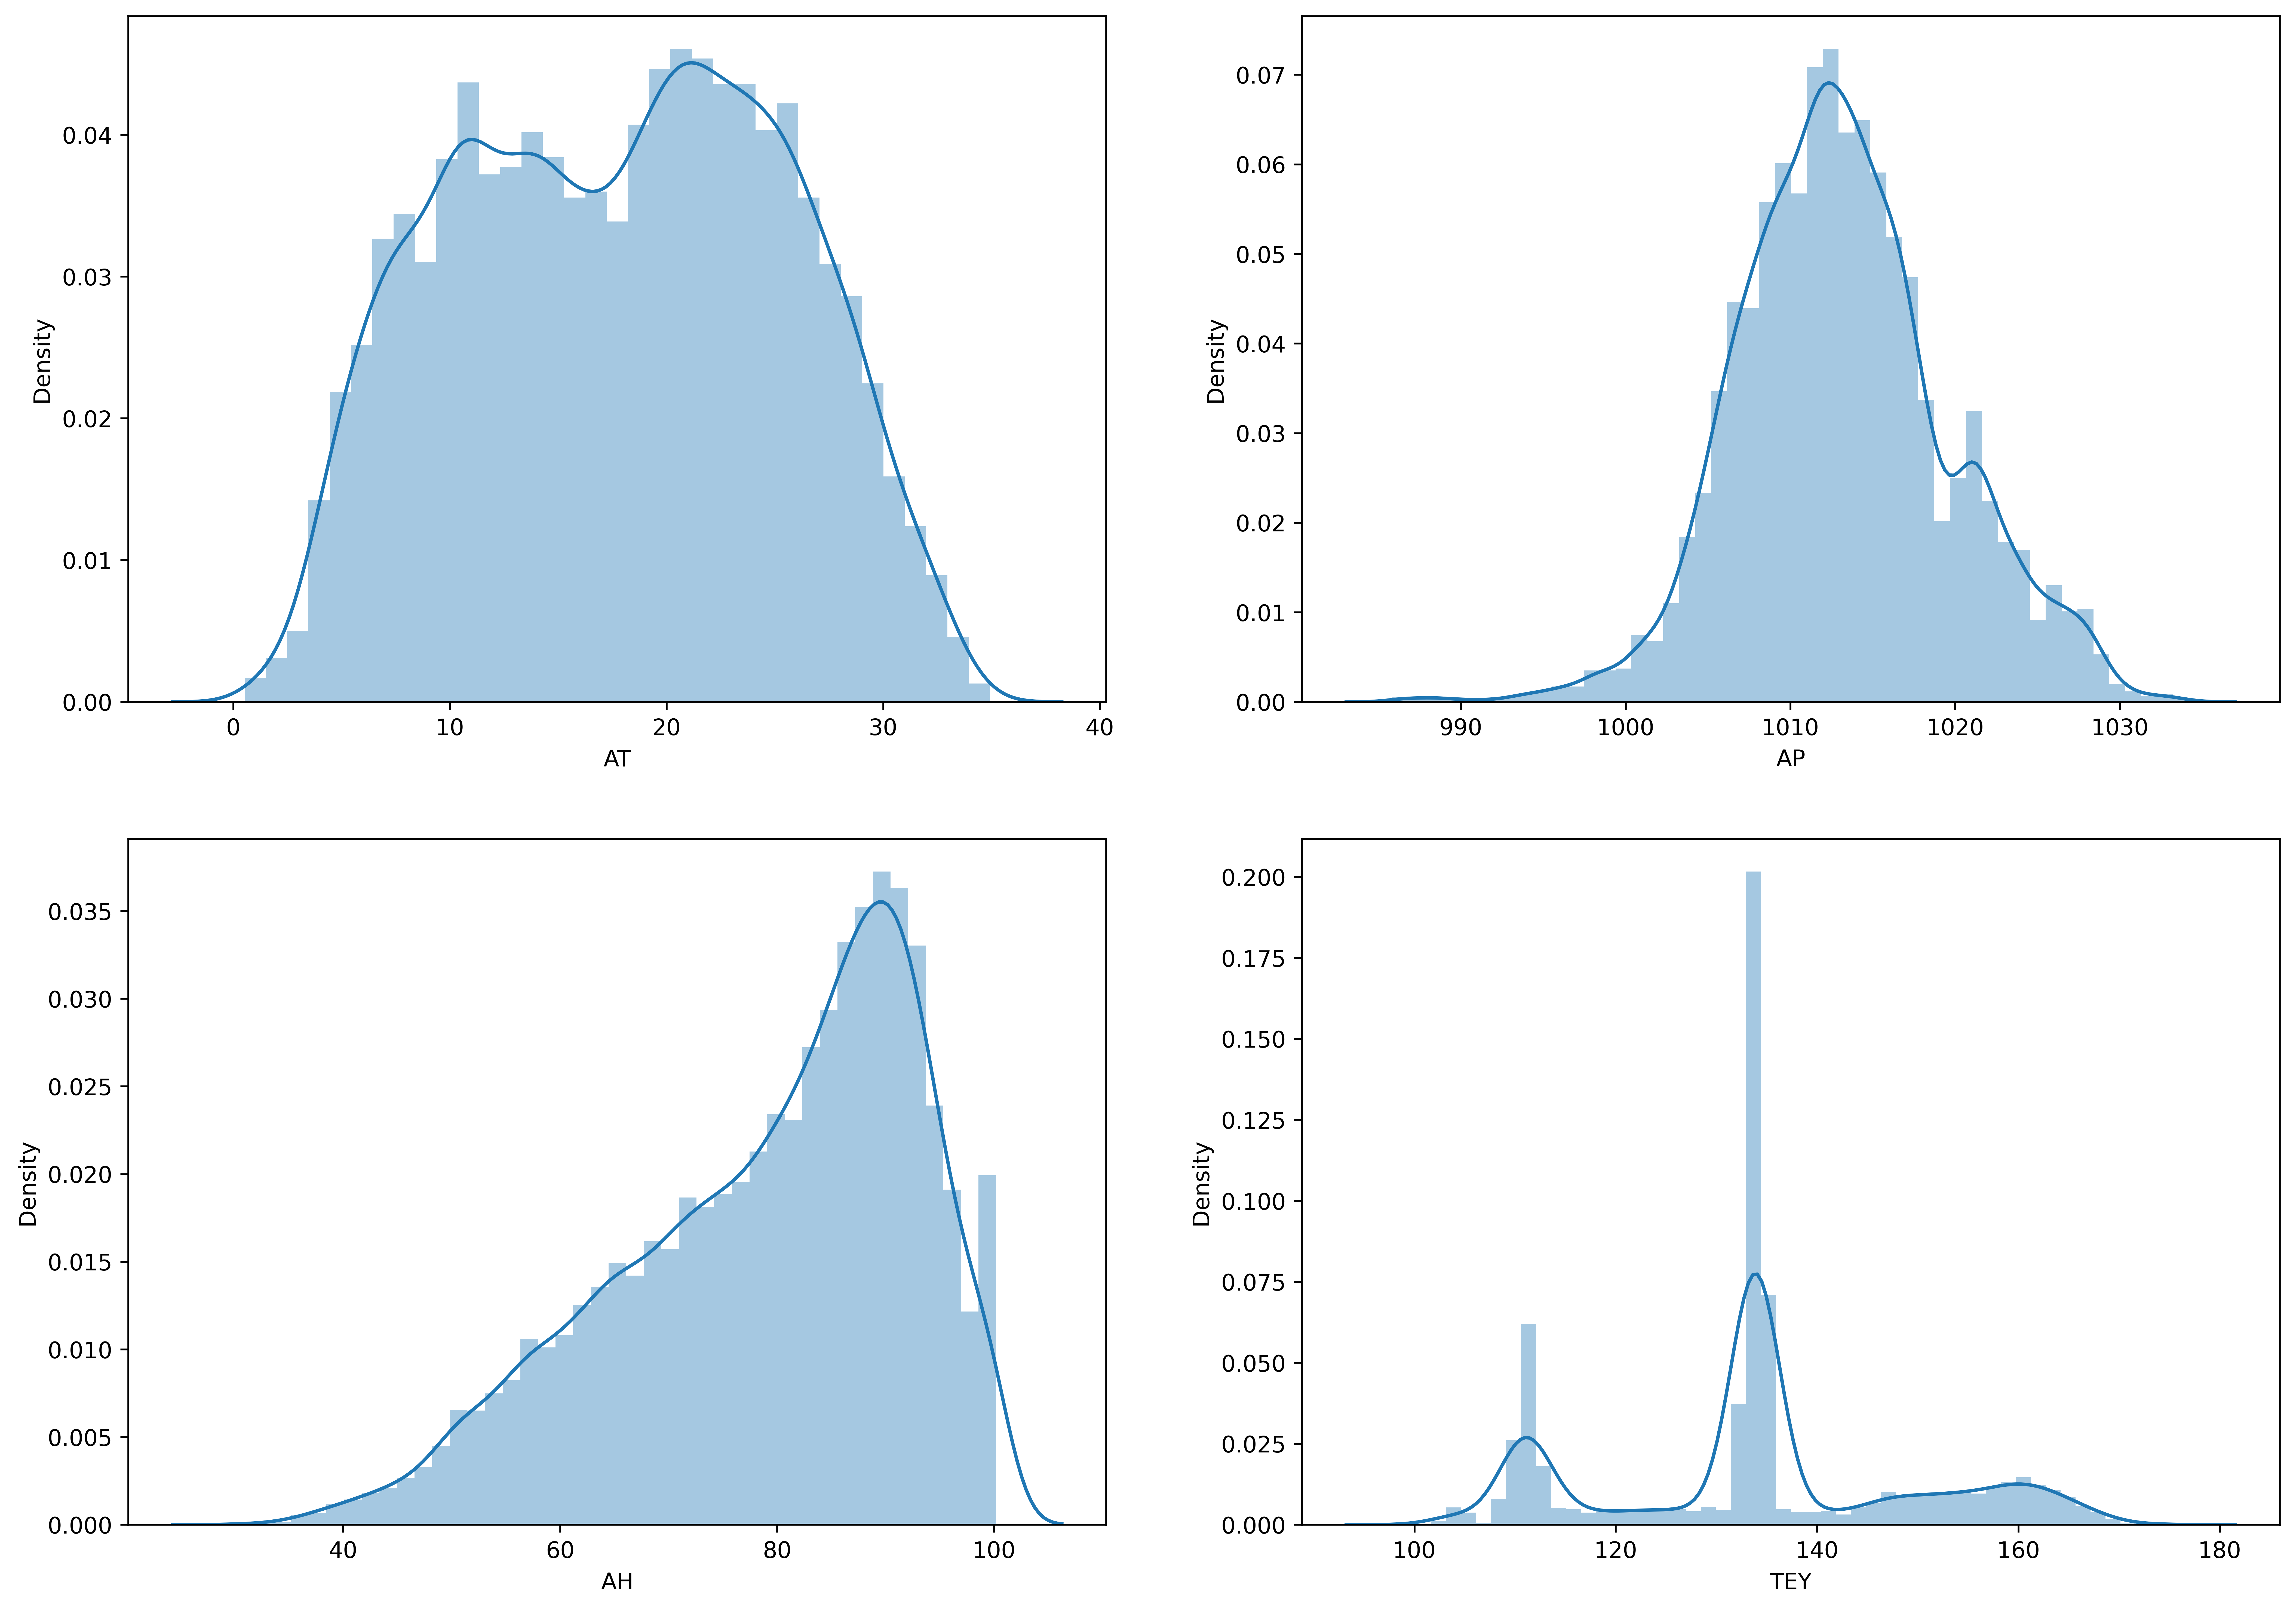

In [43]:
# distplot

fig, ax = plt.subplots(2,2, figsize = (17,12),dpi=600)

sns.distplot(gas1['AT'], ax = ax[0,0])
sns.distplot(gas1['AP'], ax = ax[0,1])
sns.distplot(gas1['AH'], ax = ax[1,0])
sns.distplot(gas1['TEY'], ax = ax[1,1])
plt.show()

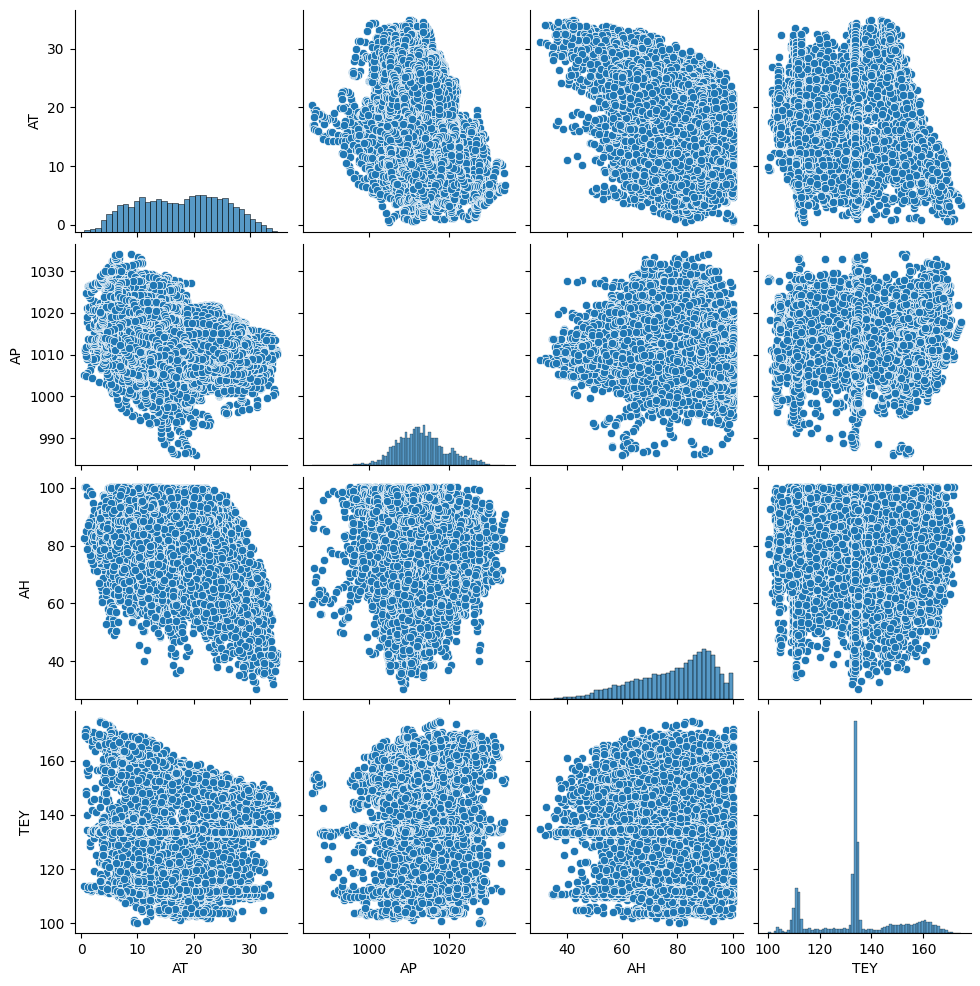

In [44]:
sns.pairplot(gas1)
plt.show()

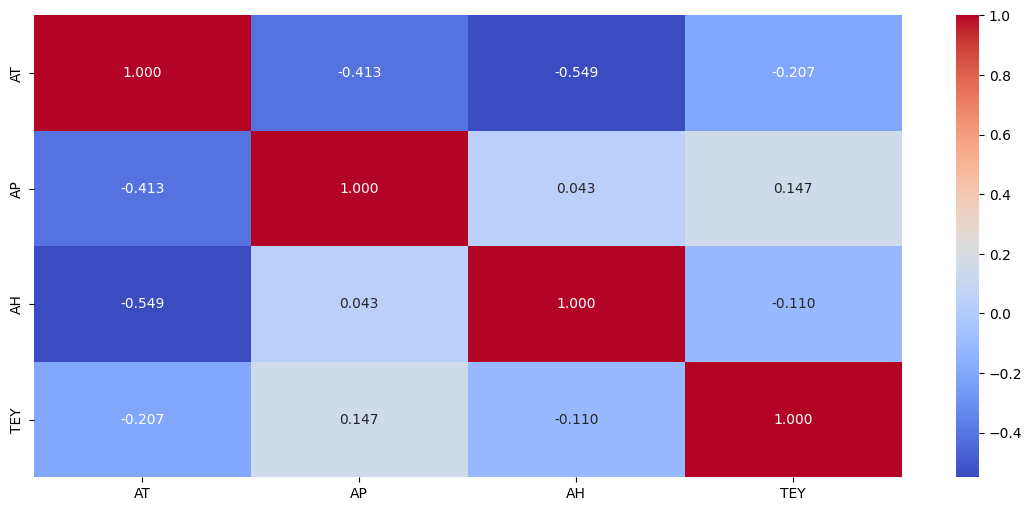

In [45]:
plt.figure(figsize = (14,6))
sns.heatmap(gas1.corr(),cmap = 'coolwarm', annot=True, fmt='.3f')
plt.show()

#Splitting Data

In [46]:
X = gas1.drop(['TEY'],axis=1)
y = gas1['TEY']
X

,AT,AP,AH
0,6.8594,1007.9,96.799
1,6.7850,1008.4,97.118
2,6.8977,1008.8,95.939
3,7.0569,1009.2,95.249
4,7.3978,1009.7,95.150
...,...,...,...
15034,9.0301,1005.6,98.460
15035,7.8879,1005.9,99.093
15036,7.2647,1006.3,99.496
15037,7.0060,1006.8,99.008


In [47]:
y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

#Standardizing

In [48]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
scl.fit(X)
X_standardized = scl.transform(X)

In [49]:
pd.DataFrame(X_standardized).describe()

,0,1,2
count,1.503900e+04,1.503900e+04,1.503900e+04
mean,4.913654e-16,-1.875504e-14,2.570219e-16
std,1.000033e+00,1.000033e+00,1.000033e+00
min,-2.276462e+00,-4.266288e+00,-3.536594e+00
25%,-8.392292e-01,-6.706510e-01,-6.796337e-01
50%,5.566605e-02,-6.227861e-02,2.277844e-01
75%,8.051309e-01,5.772924e-01,7.916582e-01
max,2.266234e+00,3.275970e+00,1.528011e+00


In [51]:
!pip install scikeras

In [52]:
# Importing the necessary packages
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasRegressor
from keras.optimizers import Adam
from keras.layers import Dropout

# Hyperparameters all at once


The hyperparameter optimization was carried out by taking 2 hyperparameters at once. We may have missed the best values. The performance can be further improved by finding the optimum values of hyperparameters all at once given by the code snippet below.

This process is computationally expensive.

In [ ]:
def create_model(learning_rate, dropout_rate, activation_function,init, neuron1, neuron2):
  model = Sequential()
  model.add(Dense(neuron1,input_dim=11, kernel_initializer=init, activation = activation_function))
  model.add(Dropout(dropout_rate))
  model.add(Dense(neuron2, input_dim = neuron1, kernel_initializer = init, activation = activation_function))
  model.add(Dropout(dropout_rate))
  model.add(Dense(1, activation = 'relu'))

  adam = Adam(learning_rate= learning_rate)
  model.compile(loss = 'binary_crossentropy',optimizer = adam, metrics = ['accuracy'])
  return model

# Define the grid search parameters

batch_size = [10,20,40]
epochs = [10,50,100]
learning_rate = [0.001, 0.01, 0.1]
dropout_rate = [0.0, 0.1, 0.2]
activation_function = ['relu', 'tanh', 'linear']
init = ['uniform', 'normal', 'zero']
neuron1 = [4,8,16]
neuron2 = [2,4,8]
# Create the model

model = KerasRegressor(build_fn = create_model, verbose = 0,dropout_rate = dropout_rate, learning_rate = learning_rate,
                       activation_function= activation_function, init = init,neuron1 = neuron1,neuron2 = neuron2)

# Make a dictionary of the grid search parameters

param_grids = dict(batch_size = batch_size, epochs = epochs, learning_rate = learning_rate,
                   dropout_rate = dropout_rate, activation_function=activation_function, init = init,
                   neuron1 = neuron1, neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model, param_grid = param_grids, cv = KFold(), verbose = 10)
grid_result = grid.fit(X_standardized, y)

# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Streaming output truncated to the last 5000 lines.
[CV 1/5; 6062/6561] START activation_function=linear, batch_size=40, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
[CV 1/5; 6062/6561] END activation_function=linear, batch_size=40, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.2s
[CV 2/5; 6062/6561] START activation_function=linear, batch_size=40, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
[CV 2/5; 6062/6561] END activation_function=linear, batch_size=40, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.2s
[CV 3/5; 6062/6561] START activation_function=linear, batch_size=40, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
[CV 3/5; 6062/6561] END activation_function=linear, batch_size=40, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=